In [143]:
# import wget
#
# url = 'http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz'
# myfile = wget.download(url)

In [144]:
# import tarfile
# file = tarfile.open('food-101.tar.gz')
# file.extractall('./food-101')

In [145]:
# Get labels
import json
import os

import keras.layers.activation
from tqdm.notebook import tqdm

def get_labels(label_path):
    """
    Accepts a label path (in the form of a JSON) and returns the file
    as a Python object.
    """
    with open(label_path) as f:
        return json.load(f)

train_labels = get_labels("C:/Users/vivek/Downloads/food-101/food-101/meta/train.json")
test_labels = get_labels("C:/Users/vivek/Downloads/food-101/food-101/meta/test.json")

In [146]:
# Should be 750 for training set and 250 for test set
print(len(train_labels["churros"]))
print(len(test_labels["churros"]))

750
250


In [147]:
import pathlib
import numpy as np
import tensorflow as tf
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [148]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
    targe_folder = target_dir+target_class
    random_image = random.sample(os.listdir(targe_folder),1)
    img = mpimg.imread(targe_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")
    return img

Image shape: (512, 512, 3)


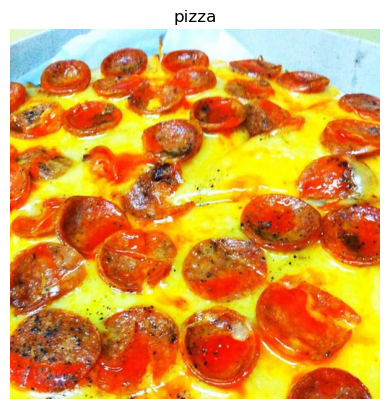

In [149]:
img = view_random_image(target_class="pizza",target_dir="pizza_steak/train/")

In [150]:

tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[224, 241, 197],
        [228, 245, 201],
        [228, 245, 200],
        ...,
        [185, 239, 205],
        [183, 237, 203],
        [180, 234, 200]],

       [[226, 243, 199],
        [229, 246, 201],
        [229, 246, 201],
        ...,
        [183, 237, 203],
        [182, 236, 202],
        [181, 235, 201]],

       [[228, 246, 198],
        [231, 249, 201],
        [230, 250, 201],
        ...,
        [185, 236, 203],
        [185, 236, 203],
        [185, 236, 203]],

       ...,

       [[248, 253,  36],
        [245, 251,  31],
        [242, 248,  28],
        ...,
        [244, 244,   0],
        [244, 242,   7],
        [244, 241,  12]],

       [[246, 254,  33],
        [245, 253,  32],
        [244, 250,  28],
        ...,
        [246, 242,   0],
        [247, 241,   7],
        [245, 240,  14]],

       [[244, 252,  31],
        [244, 252,  31],
        [245, 253,  30],
        ...,
        [248, 242,   

In [151]:
img.shape

(512, 512, 3)

In [152]:
#Normalizing data
img/255.

array([[[0.87843137, 0.94509804, 0.77254902],
        [0.89411765, 0.96078431, 0.78823529],
        [0.89411765, 0.96078431, 0.78431373],
        ...,
        [0.7254902 , 0.9372549 , 0.80392157],
        [0.71764706, 0.92941176, 0.79607843],
        [0.70588235, 0.91764706, 0.78431373]],

       [[0.88627451, 0.95294118, 0.78039216],
        [0.89803922, 0.96470588, 0.78823529],
        [0.89803922, 0.96470588, 0.78823529],
        ...,
        [0.71764706, 0.92941176, 0.79607843],
        [0.71372549, 0.9254902 , 0.79215686],
        [0.70980392, 0.92156863, 0.78823529]],

       [[0.89411765, 0.96470588, 0.77647059],
        [0.90588235, 0.97647059, 0.78823529],
        [0.90196078, 0.98039216, 0.78823529],
        ...,
        [0.7254902 , 0.9254902 , 0.79607843],
        [0.7254902 , 0.9254902 , 0.79607843],
        [0.7254902 , 0.9254902 , 0.79607843]],

       ...,

       [[0.97254902, 0.99215686, 0.14117647],
        [0.96078431, 0.98431373, 0.12156863],
        [0.94901961, 0

In [153]:
from keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen=ImageDataGenerator(rescale=1./255.)
valid_datagen=ImageDataGenerator(rescale=1./255.)

#setup path to data dir
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)
valid_data = train_datagen.flow_from_directory(directory=test_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [154]:
#Build a CNN model
model_1 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1,activation="sigmoid"),])
#compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_1 = model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 154ms/step - loss: 0.5377 - accuracy: 0.7273 - val_loss: 0.4614 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 0.4290 - accuracy: 0.8133 - val_loss: 0.3473 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 6s 122ms/step - loss: 0.4016 - accuracy: 0.8233 - val_loss: 0.3932 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 6s 122ms/step - loss: 0.3759 - accuracy: 0.8353 - val_loss: 0.3258 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 6s 126ms/step - loss: 0.3073 - accuracy: 0.8860 - val_loss: 0.3402 - val_accuracy: 0.8480


In [155]:
model_1.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_67 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_69 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

In [156]:
#009 Trying a non-CNN model on our image data
#trying to fit image data in non-cnn model
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),]
)
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 136ms/step - loss: 0.6938 - accuracy: 0.4760 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 129ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 130ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 136ms/step - loss: 0.6932 - accuracy: 0.4867 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 134ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [157]:
#010 Improving our non-CNN model by adding more layers

tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"), ]
)
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 131ms/step - loss: 2.1030 - accuracy: 0.6033 - val_loss: 0.4892 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 6s 129ms/step - loss: 0.7353 - accuracy: 0.7233 - val_loss: 0.7522 - val_accuracy: 0.7220
Epoch 3/5
47/47 [==============================] - 6s 128ms/step - loss: 0.6451 - accuracy: 0.7407 - val_loss: 0.9332 - val_accuracy: 0.6480
Epoch 4/5
47/47 [==============================] - 6s 124ms/step - loss: 0.6182 - accuracy: 0.7400 - val_loss: 0.6498 - val_accuracy: 0.6860
Epoch 5/5
47/47 [==============================] - 6s 128ms/step - loss: 0.5525 - accuracy: 0.7680 - val_loss: 0.8182 - val_accuracy: 0.6940


Image shape: (512, 512, 3)


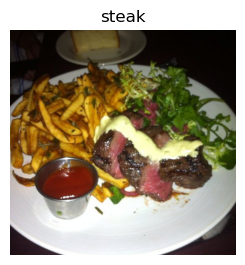

In [158]:
#011 Breaking our CNN model down part 1 Becoming one with the data
# biany classification breakdown
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")



In [159]:
#012 Breaking our CNN model down part 2 Preparing to load our data
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [160]:
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(244,244),
                                             class_mode="binary",
                                             batch_size=32)
#013 Breaking our CNN model down part 3 Loading our data with ImageDataGenerator
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(244,244),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [161]:
images,labels = train_data.next()
len(images),len(labels)

(32, 32)

In [162]:
#Get the images
images[:2],images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [163]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [164]:
#014 Breaking our CNN model down part 4 Building a baseline CNN model
# create a CNN model (Baseline model)
from keras.optimizers import Adam
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation,Dropout
from keras import Sequential

# create the baseline model
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=(3,3),
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(244,244,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])



In [165]:
len(train_data),len(test_data)

(47, 16)

In [166]:
#015 Breaking our CNN model down part 5 Looking inside a Conv2D layer
#016 Breaking our CNN model down part 6 Compiling and fitting our baseline CNN
#Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics = ["accuracy"])

#Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 7s 139ms/step - loss: 0.7604 - accuracy: 0.6807 - val_loss: 0.4245 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 6s 135ms/step - loss: 0.4367 - accuracy: 0.8093 - val_loss: 0.4191 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 7s 139ms/step - loss: 0.3412 - accuracy: 0.8667 - val_loss: 0.4120 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 6s 127ms/step - loss: 0.2029 - accuracy: 0.9320 - val_loss: 0.3615 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 6s 127ms/step - loss: 0.0966 - accuracy: 0.9767 - val_loss: 0.3926 - val_accuracy: 0.8320


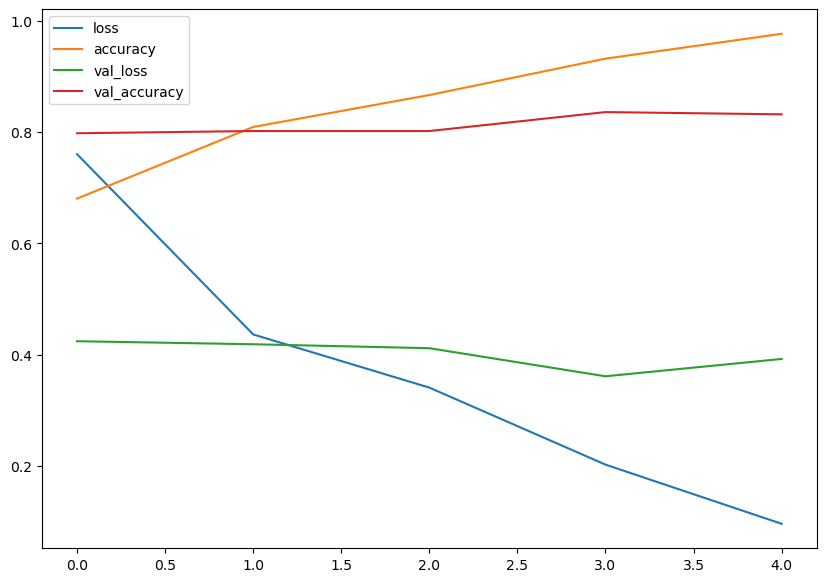

In [167]:
#017 Breaking our CNN model down part 7 Evaluating our CNN's training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [168]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.plot(epochs,loss,label="training_loss")
    plt.plot(epochs,val_loss,label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    #plot  accuracy
    plt.figure()
    plt.plot(epochs,accuracy,label="training_accuracy")
    plt.plot(epochs,val_accuracy,label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()


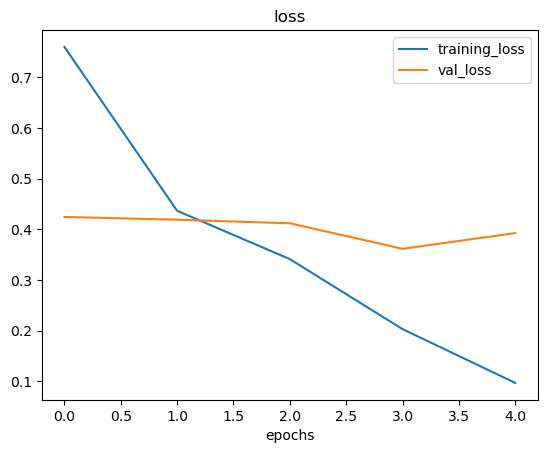

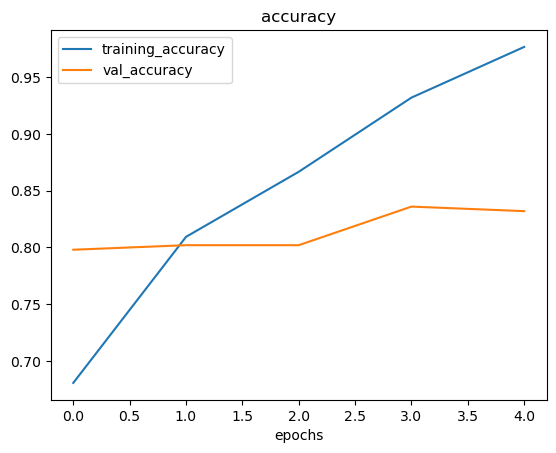

In [169]:
plot_loss_curves(history_4)

In [170]:
#018 Breaking our CNN model down part 8 Reducing overfitting with Max Pooling
# ideally the above loss curves should be very similar to each other
# adjust the model Parameters
model_5 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(244,244,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Dropout(0.3),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation=tf.keras.activations.sigmoid)
])



In [171]:
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=Adam(),
                metrics=['accuracy'])

In [172]:
history_5 = model_5.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 133ms/step - loss: 0.6086 - accuracy: 0.6820 - val_loss: 0.5920 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 6s 127ms/step - loss: 0.5127 - accuracy: 0.7573 - val_loss: 0.4712 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 6s 132ms/step - loss: 0.4476 - accuracy: 0.7980 - val_loss: 0.4283 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 7s 155ms/step - loss: 0.4449 - accuracy: 0.8093 - val_loss: 0.4539 - val_accuracy: 0.7800
Epoch 5/5
47/47 [==============================] - 7s 152ms/step - loss: 0.4345 - accuracy: 0.8107 - val_loss: 0.3857 - val_accuracy: 0.8440


In [173]:
model_5.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_73 (Conv2D)          (None, 242, 242, 10)      280       
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 121, 121, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_74 (Conv2D)          (None, 119, 119, 10)      910       
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 59, 59, 10)       0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 59, 59, 10)        0         
                                                                 
 conv2d_75 (Conv2D)          (None, 57, 57, 10)      

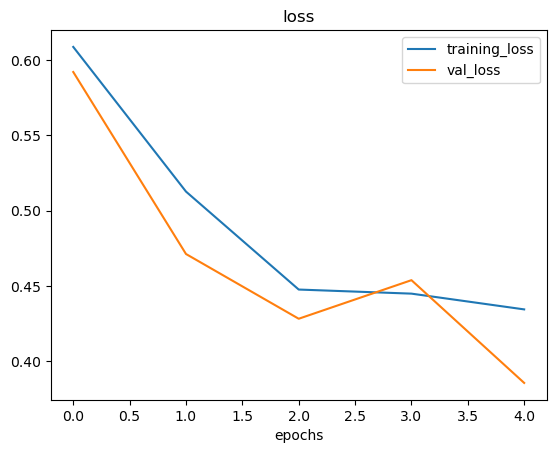

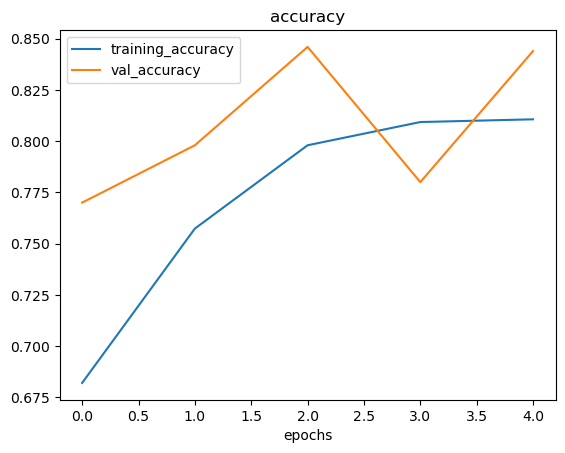

In [174]:
plot_loss_curves(history_5)

In [175]:
#019 Breaking our CNN model down part 9 Reducing overfitting with data augmentation
train_data_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.3,
                                          horizontal_flip=True,)
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [176]:
#020 Breaking our CNN model down part 10 Visualizing our augmented data
train_data_augmented = train_data_augmented.flow_from_directory(train_dir,
                                                                target_size=(244,244),
                                                                batch_size=32,
                                                                class_mode="binary",
                                                                shuffle=True)

train_data= train_datagen.flow_from_directory(train_dir,
                                                                target_size=(244,244),
                                                                batch_size=32,
                                                                class_mode="binary",
                                                                shuffle=True)
test_data= test_datagen.flow_from_directory(test_dir,
                                                                target_size=(244,244),
                                                                batch_size=32,
                                                                class_mode="binary",
                                                                shuffle=True)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [177]:
images,labels = test_data.next()
augmentd_images,augmented_labels = train_data_augmented.next()

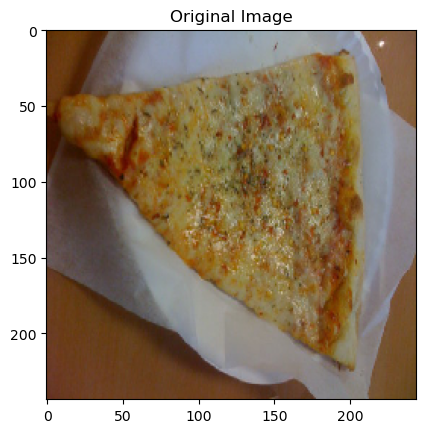

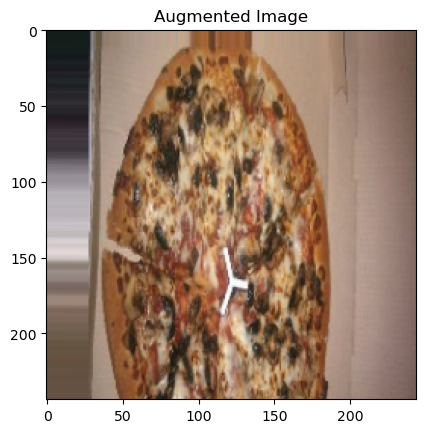

In [178]:
random_number = random.randint(0,31)
plt.imshow(images[random_number])
plt.title("Original Image")
plt.show()
plt.imshow(augmentd_images[random_number])
plt.title("Augmented Image")
plt.show()

In [179]:
#021 Breaking our CNN model down part 11 Training a CNN model on augmented data
model_6 = Sequential([
    Conv2D(10,3,activation=tf.keras.activations.relu),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation=tf.keras.activations.relu),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation=tf.keras.activations.relu),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation=tf.keras.activations.sigmoid)
])

model_6.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_6=model_6.fit(train_data_augmented,epochs=5,steps_per_epoch=len(train_data_augmented),validation_data=test_data,validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 21s 445ms/step - loss: 0.6700 - accuracy: 0.5780 - val_loss: 0.5729 - val_accuracy: 0.7360
Epoch 2/5
47/47 [==============================] - 19s 412ms/step - loss: 0.6161 - accuracy: 0.6680 - val_loss: 0.5603 - val_accuracy: 0.7180
Epoch 3/5
47/47 [==============================] - 19s 403ms/step - loss: 0.5573 - accuracy: 0.7260 - val_loss: 0.4840 - val_accuracy: 0.7540
Epoch 4/5
47/47 [==============================] - 19s 407ms/step - loss: 0.5104 - accuracy: 0.7520 - val_loss: 0.3728 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 19s 410ms/step - loss: 0.4925 - accuracy: 0.7707 - val_loss: 0.3619 - val_accuracy: 0.8500


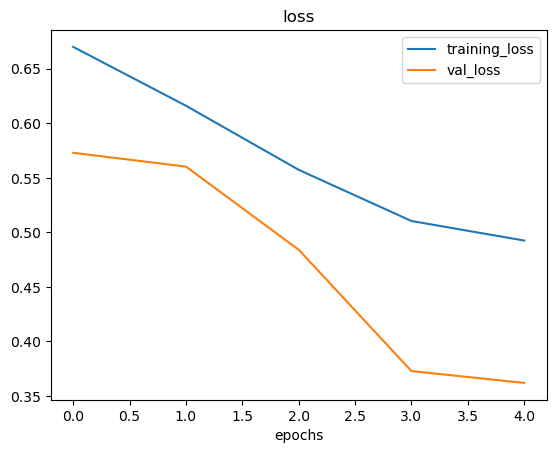

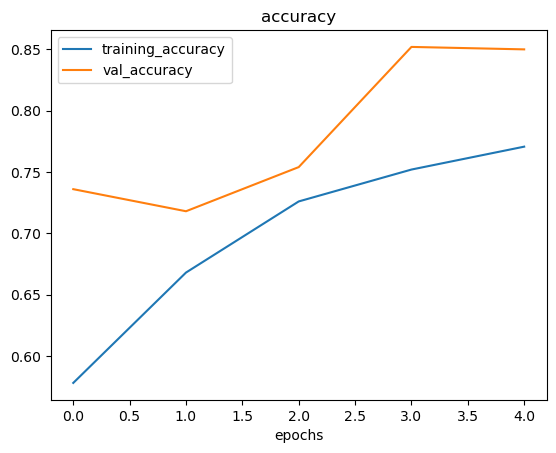

In [180]:
plot_loss_curves(history_6)

In [181]:
#022 Breaking our CNN model down part 12 Discovering the power of shuffling data
#Train a model with Shuffle = True

In [182]:
#023 Breaking our CNN model down part 13 Exploring options to improve our model
#024 Downloading a custom image to make predictions on
print(class_names)

['pizza' 'steak']


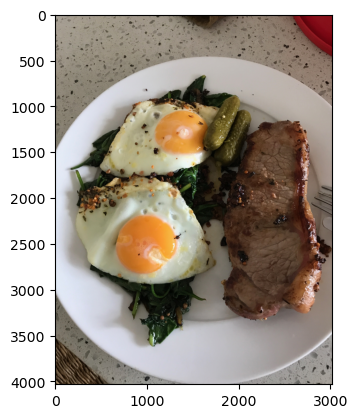

In [183]:
import matplotlib.image as mpimg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)

In [184]:
steak.shape

(4032, 3024, 3)

In [189]:
def load_and_prep_image(filename,img_shape=244):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img,size=[img_shape,img_shape])
    img = img/255
    return img

In [190]:
#025 Writing a helper function to load and preprocessing custom images
steak=load_and_prep_image("03-steak.jpeg")

In [191]:
model_6.predict(tf.expand_dims(steak,axis=0))

1/1 [==============================] - 0s 287ms/step


array([[0.8543421]], dtype=float32)

In [ ]:
#026 Making a prediction on a custom image with our trained CNN